Yonghui Li (Aries) 201605

Lyh710@gmail.com

# Data Science Problem for Applicants

# Problem:
A retail bank has approached you to predict the success of telemarketing campaigns for selling long-term deposits at the bank. Your task is to build a model to predict whether a client will subscribe to a term deposit. 

# Requirements:
You can use any open source tools you like to complete the analysis, but R or Python is preferred. On completion of the task we will ask you to do a 10-15 minute presentation on your results, and provide any code used to build the model. We will be assessing how you approach the problem, your technical skills (e.g. algorithms and feature selection), and how you communicate the results. 

# Data:
The bank has provided you with data collected from 2008 to 2010 (which includes the effects of the Global Financial Crisis). The data includes details related to client and product attributes. 

# Attribute Information:

   ## Input variables:
   
   ### bank client data:
   
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   ### related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
   ### other attributes:
  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  ### Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# Step 1: Prepare data for analysis:
1. Import data
2. Explore data
3. Cleansing data (Encode "categorical" variables into "numeric" correctly, take care of "unknown" etc.)
4. Features engineering (rough)

In [1]:
'''
output
- bank_df, shape(499, 17), 7 int64 columns, 10 object columns
- bank_df_raw, shape(499, 17), 7 int64 columns, 10 object columns, copy of bank_df
'''
import pandas as pd # Employ Pandas for data manipulation

# 1. Import data
bank_df = pd.read_csv('bank1.csv', sep=";") # default is ",", which will fail

# 2. Explore data
print(bank_df.shape)    # In total 45211 observations, 17 variables (Attributes)
print(bank_df.dtypes)   # Look at the data type of each variable (Attribute)
print(bank_df.head(10)) # Look at the first 10 data samples
print(bank_df.tail(10)) # Look at the last 10 data samples

bank_df_raw = bank_df.copy() # back up the original dataset for multiple tests

(45211, 17)
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object
   age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   t

### Imported data is consistent with the "description" information provided by the WORD document, we can proceed.

In [2]:
'''
input
- bank_df, shape(499, 17), 7 int64 columns, 10 object columns
output
- cat_cols, shape(10,) of object
'''
# 3. Cleansing data (Encode "categorical" variable into "numeric" correctly, take care of "unknown" etc.)

# Select all the Variables (Attributes) that are in "object" types, indicating they are "categorical"
cat_cols = bank_df.select_dtypes(['object']).columns
for col in cat_cols:
    print(col)

job
marital
education
default
housing
loan
contact
month
poutcome
y


### 10 out of 17 variables are categorical
### We can first directly label-encode each of these 10 categorical variable into numeric 

In [3]:
'''
input
- bank_df_raw, shape(499, 17), 7 int64 columns, 10 object columns
- cat_cols, shape(10,) of object
output
- bank_df_raw, shape(499, 17), 7 int64 columns, 10 object columns, no change in the cell
- bank_df_le, shape(499, 17), 7 int64 columns, 10 int32 columns
            , 10 object columns of bank_df_raw converted to int32
------------------------------- Data Info Table -------------------------------
            age        job   marital  education   default       balance  \
mean  41.256513   4.342685  1.172345   1.246493  0.024048   1461.032064   
std   10.626477   3.253173  0.596473   0.750744  0.153352   2434.230131   
min   20.000000   0.000000  0.000000   0.000000  0.000000  -1206.000000   
max   78.000000  11.000000  2.000000   3.000000  1.000000  16873.000000   

       housing      loan   contact        day      month     duration  \
mean  0.571142  0.166333  0.599198  15.787575   5.492986   270.685371   
std   0.495410  0.372753  0.882493   8.213453   3.042116   266.766273   
min   0.000000  0.000000  0.000000   1.000000   0.000000     5.000000   
max   1.000000  1.000000  2.000000  31.000000  11.000000  1877.000000   

       campaign       pdays   previous  poutcome         y  
mean   2.498998   41.356713   0.529058  2.511022  0.128257  
std    2.439941   99.320973   1.536914  1.043905  0.334711  
min    1.000000   -1.000000   0.000000  0.000000  0.000000  
max   24.000000  462.000000  20.000000  3.000000  1.000000  
------------------------------- Data Info Table -------------------------------
'''
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

bank_df_le = bank_df_raw.copy()

for col in cat_cols:    
    bank_df_le[col] = le.fit_transform(bank_df_le[col])    

print(bank_df_le.shape)    # In total 45211 observations, 17 variables (Attributes)
print(bank_df_le.dtypes)   # Look at the data type of each variable (Attribute)
print(bank_df_le.head(10)) # Look at the first 10 data samples
print(bank_df_le.tail(10)) # Look at the last 10 data samples

(45211, 17)
age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object
   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   
5   35    4        1          2        0      231        1     0        2   
6   28    4        2          2        0      447        1     1        2   
7   42    2        0          2    

### All the "yes/no" variable are correctly encoded, with yes=1 and no=0 
(default, housing, loan, y)
   
### Some of the variables are encoded reasonably. For example, Variable "education": tertiary=2, secondary=1, primary=0 and unkown=3, which is generally making sense by implying higher education level corresponds to higher financial strength 
(education)
    
### Some of the variables are encoded arguably. For example, Variable "job": management=4, technician=9, entrepreneur=2, blue-collar=1, unknown=11, retired=5, admin.=0, student=8, etc. Without more concrete knowledge, it may be appropriate to leave such encoding as they are 
(job, marital, contact, poutcome)
    
### Some of the encoding does not make sense, and will need to be further revised. For example, Variable "month": may=8, nov=9 
(month)
        
### Finally, one of the original numeric variable require revision as well, the "pdays". We should consider turn "-1" into a more meaningful value, such as "9999" to indicate this client was not successfully contacted before
(pdays)

In [4]:
'''
input
- bank_df_raw, shape(499, 17), 7 int64 columns, 10 object columns
- bank_df_le, shape(499, 17), 7 int64 columns, 10 int32 columns
output
- bank_df_le, shape(499, 17), 8 int64 columns, 9 int32 columns
            , 1 int32 columns of bank_df_le converted to int64
------------------------------- Data Info Table -------------------------------
            age        job   marital  education   default       balance  \
mean  41.256513   4.342685  1.172345   1.246493  0.024048   1461.032064   
std   10.626477   3.253173  0.596473   0.750744  0.153352   2434.230131   
min   20.000000   0.000000  0.000000   0.000000  0.000000  -1206.000000   
max   78.000000  11.000000  2.000000   3.000000  1.000000  16873.000000   

       housing      loan   contact        day      month     duration  \
mean  0.571142  0.166333  0.599198  15.787575   6.190381   270.685371   
std   0.495410  0.372753  0.882493   8.213453   2.433416   266.766273   
min   0.000000  0.000000  0.000000   1.000000   1.000000     5.000000   
max   1.000000  1.000000  2.000000  31.000000  12.000000  1877.000000   

       campaign       pdays   previous  poutcome         y  
mean   2.498998  842.959920   0.529058  2.511022  0.128257  
std    2.439941  318.082689   1.536914  1.043905  0.334711  
min    1.000000    1.000000   0.000000  0.000000  0.000000  
max   24.000000  999.000000  20.000000  3.000000  1.000000  
------------------------------- Data Info Table -------------------------------
'''
# fix variables with encoding issues

month_dict = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
              'jul': 7, 'aug': 8, 'sep':9, 'oct': 10, 'nov': 11, 'dec': 12}

bank_df_fix = bank_df_raw.copy()

bank_df_le["month"] = bank_df_fix["month"].map(month_dict)
bank_df_le.loc[bank_df_le['pdays']==-1,'pdays'] = 999

for col in bank_df_le.columns:
    print(bank_df_le[col].describe())

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64
count    45211.000000
mean         4.339762
std          3.272657
min          0.000000
25%          1.000000
50%          4.000000
75%          7.000000
max         11.000000
Name: job, dtype: float64
count    45211.000000
mean         1.167725
std          0.608230
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: marital, dtype: float64
count    45211.000000
mean         1.224813
std          0.747997
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: education, dtype: float64
count    45211.000000
mean         0.018027
std          0.133049
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: 

### check for missing data

In [5]:
'''
input
- bank_df_le, shape(499, 17), 8 int64 columns, 9 int32 columns
output
- bank_df_le, shape(499, 17), 8 int64 columns, 9 int32 columns, no change in the cell
------------------------------- Data Info Table -------------------------------
            age        job   marital  education   default       balance  \
mean  41.256513   4.342685  1.172345   1.246493  0.024048   1461.032064   
std   10.626477   3.253173  0.596473   0.750744  0.153352   2434.230131   
min   20.000000   0.000000  0.000000   0.000000  0.000000  -1206.000000   
max   78.000000  11.000000  2.000000   3.000000  1.000000  16873.000000   

       housing      loan   contact        day      month     duration  \
mean  0.571142  0.166333  0.599198  15.787575   6.190381   270.685371   
std   0.495410  0.372753  0.882493   8.213453   2.433416   266.766273   
min   0.000000  0.000000  0.000000   1.000000   1.000000     5.000000   
max   1.000000  1.000000  2.000000  31.000000  12.000000  1877.000000   

       campaign       pdays   previous  poutcome         y  
mean   2.498998  842.959920   0.529058  2.511022  0.128257  
std    2.439941  318.082689   1.536914  1.043905  0.334711  
min    1.000000    1.000000   0.000000  0.000000  0.000000  
max   24.000000  999.000000  20.000000  3.000000  1.000000  
------------------------------- Data Info Table -------------------------------
'''
print(bank_df_le.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


1. No missing data was found in our label-encoded dataset.
2. It should be noted that we did not specifically deal with the original "unkown" value. At this stage, we consider "unkown" as "ambigous information collected" rather than "data missing".

# Step 2: building machine-learning models

In [6]:
'''
input
- bank_df_le, shape(499, 17), 8 int64 columns, 9 int32 columns
output
- y_train, shape(399,) of int32
- y_test, shape(100,) of int32
'''
# 1. Split data into training (80%) and test (20%) with "Shuffle"
from sklearn.cross_validation import train_test_split

X = bank_df_le.iloc[:,0:-1]
y = bank_df_le.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 
# set random_state=1 so that the results will be reproducible every time the code was run

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(36168, 16)
(9043, 16)
(36168,)
(9043,)


## We employ LogisticRegression & RandomForest as "bench-mark" models

## We essemble multiple steps into "pipe" for more robust coding

<img src="files/imgs/1_Pipe.jpg">
<img src="files/imgs/2_CV_1.jpg">

In [7]:
'''
input
- y_train, shape(399,) of int32
- y_test, shape(100,) of int32
output
- pipe_lr, transforms: [('scl', StandardScaler()), ('clf', LogisticRegression(random_state=1))]
- y_train, shape(399,) of int32
- y_test, shape(100,) of int32
'''
# 2. Standarize data

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

pipe_lr = Pipeline([('scl', StandardScaler()),('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
print('LG Train Accuracy: %.3f' % pipe_lr.score(X_train, y_train))
print('LG Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

pipe_rf = Pipeline([('scl', StandardScaler()),('clf', RandomForestClassifier(random_state=1))])
pipe_rf.fit(X_train, y_train)
print('RF Train Accuracy: %.3f' % pipe_rf.score(X_train, y_train))
print('RF Test Accuracy: %.3f' % pipe_rf.score(X_test, y_test))

LG Train Accuracy: 0.898
LG Test Accuracy: 0.899
RF Train Accuracy: 0.993
RF Test Accuracy: 0.903


### Logistic Regression achived close to 90% accuracy for both the Training data and Test data (with default hyper-parameters only), indicating little "over-fitting", which means the model can perform robustly well on un-seen data.

### RandomForest, as expected, achieved better accruacy than Logistic Regression, with more than 99% on Training data, and slightly over 90% on Test data. However, the drop of performance in Test data compared with Training data suggests the model (with default hyper-parameter only) is suffering from significant "over-fitting".

### The next step is to try improve the LogisticRegression and RandomForest models by tuning the hyper-parameters

<img src="files/imgs/2_CV_2.jpg">

In [8]:
'''
input
- pipe_lr, transforms: [('scl', StandardScaler()), ('clf', LogisticRegression(random_state=1))]
- y_train, shape(399,) of int32
output
- y_train, shape(399,) of int32
'''
# 3. Optimized hyper-parameters using cross-validation & grid-search (brute-force exhaustive method)

from sklearn.grid_search import GridSearchCV

import pickle

# LogisticRegression _ LR
C_param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid_lr = [{'clf__C': C_param_range, 'clf__penalty': ['l2'], 
                  'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']}, 
                 {'clf__C': C_param_range, 'clf__penalty': ['l1'], 'clf__solver': ['liblinear']}]
gs_lr = GridSearchCV(estimator=pipe_lr, param_grid=param_grid_lr, scoring='accuracy', cv=5)
gs_lr_fit = gs_lr.fit(X_train,y_train)
pickle.dump(gs_lr_fit, open('gs_lr_fit.pkl','wb'))

In [8]:
'''
input
- y_train, shape(399,) of int32
- y_test, shape(100,) of int32
'''
import pickle

gs_lr_fit = pickle.load(open('gs_lr_fit.pkl','rb'))
print('Best score for LR: %.3f' % gs_lr_fit.best_score_)
print('Best param for LR: %s' % gs_lr_fit.best_params_)

gs_lr_best = gs_lr_fit.best_estimator_
print('LR Train accuracy: %.3f' % gs_lr_best.score(X_train, y_train))
print('LR Test accuracy: %.3f' % gs_lr_best.score(X_test, y_test))

Best score for LR: 0.898
Best param for LR: {'clf__penalty': 'l2', 'clf__C': 10.0, 'clf__solver': 'newton-cg'}
LR Train accuracy: 0.898
LR Test accuracy: 0.899


### The training of LogisticRegression model using Grid-Search-Cross-Validation method is quick (about 2 minutes using one single core). Once done, we pickle the trained model to hard disk and load it when needed without having to train it again.

### In addition, the optimization of hyper-parameters did not provide any improve in regard to accuracy, indicating the perforamce of LR model in this specific dataset may be limited by the nature of the model, or the available data.

In [10]:
# RandomForest _ RF
param_grid_rf = [{'clf__n_estimators': [20,40,80], 'clf__criterion': ['gini', 'entropy'], 
                  'clf__max_features': [3,10], 'clf__max_depth': [3, None], 
                  'clf__min_samples_split':[1,3,10], 'clf__min_samples_leaf':[1, 3, 10],
                  'clf__bootstrap': [True, False]}]
gs_rf = GridSearchCV(estimator=pipe_rf, param_grid=param_grid_rf, scoring='accuracy', cv=5, n_jobs=-1)
gs_rf_fit = gs_rf.fit(X_train,y_train)
pickle.dump(gs_rf_fit, open('gs_rf_fit.pkl','wb'))

In [9]:
import pickle

gs_rf_fit = pickle.load(open('gs_rf_fit.pkl','rb'))
print('Best score for RF: %.3f' % gs_rf_fit.best_score_)
print('Best param for RF: %s' % gs_rf_fit.best_params_)

gs_rf_best = gs_rf_fit.best_estimator_
print('RF Train accuracy: %.3f' % gs_rf_best.score(X_train, y_train))
print('RF Test accuracy: %.3f' % gs_rf_best.score(X_test, y_test))

Best score for RF: 0.905
Best param for RF: {'clf__n_estimators': 40, 'clf__bootstrap': True, 'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__max_features': 3, 'clf__min_samples_split': 10}
RF Train accuracy: 0.971
RF Test accuracy: 0.906


### The training of RandomForest model using Grid-Search-Cross-Validation method is very time-consuming (about 2 hours using one single core, and can be brought down to less than 30 minutes by setting for "parallel mode"). Once done, we pickle the trained model to hard disk and load it when needed without having to train it again.

### The tuning of hyper-parameters of the model bring down the accuracy of Training data from 99.3% to 97.1%. At the same time, it increase the accuracy of Testing data from 90.3% to 90.6%, lowering the performance gap between Training and Testing data, indicating a rescue for the "over-fitting". This is as we expected, as the hyper-parameters are loosened for better generalization.

<img src="files/imgs/2_CV_3.jpg">

# Step 3: Will more sample help improve further, based on the optimized RF model?

### Learning Curve: sample sizes v.s. accuracy of training and test datasets

1. Diagnosis the issues of model performance (underfitting or over fitting) by plotting learning curve

2. Number of samples v.s. accuracy of training and testing datasets

3. The entire X_train dataset will be divided into 10 subsets, each with increasing size, proportion as [0.1, 0.2, ..., 1] 

4. Each subset of X_train, will be further cross_validate by K-Folds, in this case cv=10 folds.

5. Based on the ouput plot, the performance of the model is decent, yet with slight overfit

<img src="files/imgs/3_Diag.jpg">

In [10]:
from sklearn.learning_curve import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(estimator=gs_rf_best, X=X_train, 
                                                        y=y_train, train_sizes = np.linspace(0.1,1,10),
                                                        cv=10, n_jobs=-1)

# Mean and Std across K-Folds, which result in mean and std for each subset of X_train with different sample size
train_scores_mean = np.mean(train_scores, axis=1)
print('train_scores_mean: ', train_scores_mean)
train_scores_std = np.std(train_scores, axis=1)
print('train_scores_std: ', train_scores_std)
test_scores_mean = np.mean(test_scores, axis=1)
print('test_scores_mean: ', test_scores_mean)
test_scores_std = np.std(test_scores, axis=1)
print('test_scores_std: ', test_scores_std)

('train_scores_mean: ', array([ 0.96442396,  0.96714286,  0.96793651,  0.9684639 ,  0.96900768,
        0.96917051,  0.96956331,  0.97022273,  0.97099164,  0.97031428]))
('train_scores_std: ', array([ 0.00073733,  0.00098226,  0.00118584,  0.00093387,  0.00043028,
        0.00039093,  0.0003315 ,  0.00074528,  0.00049439,  0.00069024]))
('test_scores_mean: ', array([ 0.89764443,  0.89971807,  0.90264867,  0.90303589,  0.90181941,
        0.90217899,  0.90220644,  0.90289779,  0.90320217,  0.90486092]))
('test_scores_std: ', array([ 0.00287949,  0.00347947,  0.00282065,  0.0037713 ,  0.00545696,
        0.00366679,  0.00478889,  0.00386537,  0.00459193,  0.00445489]))


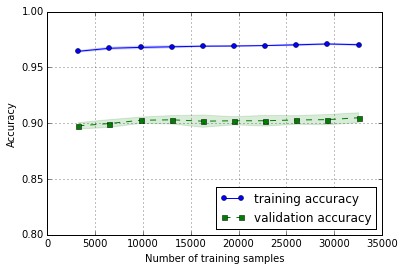

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(train_sizes, train_scores_mean, color='blue', marker='o', markersize=5, label='training accuracy')

plt.fill_between(train_sizes, train_scores_mean+train_scores_std, 
                 train_scores_mean-train_scores_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_scores_mean, color='green', linestyle='--', marker='s', 
         markersize=5, label='validation accuracy')

plt.fill_between(train_sizes, test_scores_mean+test_scores_std, 
                 test_scores_mean-test_scores_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])

plt.show()

### As we can see in the preceding learning curve plot, our model performs relatively well on the test dataset. However, it may be slightly overfitting the training data indicated by a visible gap between the training and cross-validation accuracy curves. And more available data might be helpful.

# Step 4: Further evaluate the performance of the model

## Using Confusion Matrix:

<img src="files/imgs/4_CM.jpg">

In [12]:
from sklearn.metrics import confusion_matrix

clf_final = gs_rf_best
clf_final.fit(X_train, y_train)
y_pred = clf_final.predict(X_test)
print('Test accuracy: %.3f' % clf_final.score(X_test, y_test))

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

Test accuracy: 0.906
[[7785  208]
 [ 644  406]]


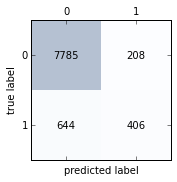

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.show()

## At the end, what did the data scientist do and how this model may be helpful?

### Assuming we are running a new campain: without this machine-learning model, the sales team will take 30 days to call in total 9043 customers (7787 + 206 + 636 + 414), and 1050 (636 + 414) of them will subscribe to a term deposit (successful sale).

### Now with this model, it will automatically filter out 8423 (7787 + 636) customers, enable the sales team to focus on 620 (206 + 414) customers only. This will probably take the team less than 3 days and successfully sale 414 products. Therefore, for the rest of the month (we still have 27 days left), the team can keep working on another 9 more rounds of campains, screening more than 90K customers, and at the end they will sale 414 x 10 = 4140 products in total.

## Without any significant cost, the machine-learning model may help increase the successful sale rate (given the same 30 days time) up to nearly 300%.

# Step 5: Possible Next Steps 

## We should try increase the True-Positive rate, customers will buy the product and the machine-learning model predict so.

### Obtain more Attributes (features) from the customers. For example, gender, address, family size (number of children and their age), which might preserve latent information for the predict problem.

### Explore more advanced (complex) algorithms, such as Neural Network and AdaBoost.